In [1]:
import numpy as np
import rebound
import matplotlib.pyplot as plt
import json
import pandas as pd
import os

In [2]:
ss_bodies = ["Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]

In [3]:
attrs = ['x', 'y', 'z', 'vx', 'vy', 'vz']

In [4]:
if os.path.exists("ss_initial_conditions.bin"):
    sim = rebound.Simulation("ss_initial_conditions.bin")
else:
    sim = rebound.Simulation()
    sim.units = ('day', 'AU', 'Msun')
    for body in ss_bodies:
        sim.add(body)
    sim.save_to_file("ss_initial_conditions.bin")
initial_sun_mass = sim.particles[0].m

In [5]:
def growth_linear(final_mass, N_outputs):
    return np.mgrid[initial_sun_mass:final_mass:N_outputs*1j]

final_masses = [2, 10, 25, 100, 1000]
growth_funcs = {
    "linear": growth_linear
}

In [6]:
tmax = 365 * 10
dt = 1
final_mass = final_masses[0]
N_outputs = tmax // dt
mass = growth_funcs["linear"](final_mass, N_outputs)

In [7]:
output = {b: {attr: [] for attr in attrs} for b in ss_bodies}
output['time'] = []
output['Msun'] = []
for i in range(N_outputs):
    sim.particles[0].m = mass[i]
    sim.integrate(sim.t + dt)
    for b, p in zip(ss_bodies, sim.particles):
        for attr in attrs:
            output[b][attr].append(getattr(p, attr))
    output['time'].append(sim.t)
    output['Msun'].append(sim.particles[0].m)

In [8]:
fn = f"standard_{tmax:010d}.json"
json.dump(output, open(fn, "w"), indent=2)

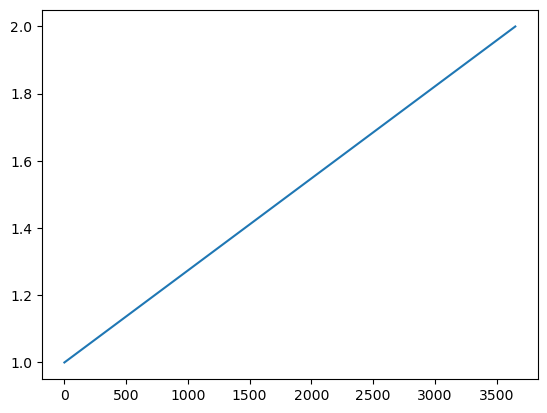

In [9]:
plt.plot(output['time'], output['Msun'])

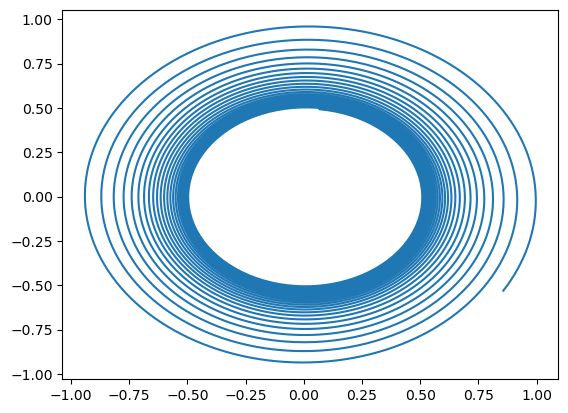

In [10]:
plt.plot(output['Earth']['x'], output['Earth']['y'])